In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("output.csv")

df.head()

,gene,expression,description,sequence
0,100760238,0.148916,>NW_003613580.1:c1856023-1834794 Gata3 [organi...,TGCCGTTTCCTTGTGCTGGGGATCGTGTGCCCTCCTGCCAGAGTCA...
1,100760532,0.387830,>NW_003613580.1:c2042129-1890886 Taf3 [organis...,AGCGGGAGGCGGAGCGAGTCCAAAATGGCGGCTCTCAGGCTGGCGC...
2,100761113,0.384858,>NW_003613580.1:2085202-2073913 Kin [organism=...,ATGGGCAAATCGGATTTTCTGAGCCCAAAGGCCATCGCGAATAGAA...
3,100760824,0.762337,>NW_003613580.1:c2073783-2053760 LOC100760824 ...,CTTAGCGAGACTGAAGACGCAAGCGAAGAGGGCGGGTGCGCCGGGA...
4,100754742,0.047732,>NW_003613580.1:c2325726-2314013 LOC100754742 ...,ATGGCTCCTCAGCTTGTTGCAAAAATTCAAGGACCTGAATTCAATC...


In [3]:
len(df)

13252

In [4]:
df = df.sort_values("expression")

df.head()

,gene,expression,description,sequence
10385,100772380,0.000000,>NW_003614997.1:51658-43872 Gnat2 [organism=Cr...,TTCTCTGAGGAGACAACAGAGATGGGGAGTGGAATCAGTGCTGAGG...
1591,103159486,0.000083,>NW_003613646.1:2369668-2349299 LOC103159486 [...,ATGAGGGAATGGCCTGGCTACCCAGTAGCCAAGAGGCTCCAGCTGA...
5087,103160349,0.000126,>NW_003613904.1:1115850-1115173 LOC103160349 [...,ATGAACGGGCAGTTCTCATCCCCAGTCAGCCCAGGTTCCGATTCTG...
8747,100773247,0.000198,>NW_003614529.1:93937-87007 LOC100773247 [orga...,GGCCGGGACTGAGTGAGTGAATGAGGTGGAGCACGGGCGGCTTGGT...
4181,103163815,0.000265,>NW_003613836.1:813123-795024 LOC103163815 [or...,TGGTGTGGGCTGTAATTAGGTCAGTGTAAGTTAAAGTAGGGCTGAG...


In [5]:
df = df.reset_index()

In [6]:
li = [i * len(df)//10 for i in range(10)] + [len(df)]
li

[0, 1325, 2650, 3975, 5300, 6626, 7951, 9276, 10601, 11926, 13252]

In [7]:
deciles = [df.loc[li[i]:li[i+1]] for i in range(10)]

In [8]:
train_l = []
test_l = []
val_l = []

for decile in deciles:
    d_train, d_test = train_test_split(decile, test_size=0.2)
    d_test, d_val = train_test_split(d_test, test_size=0.5)
    
    train_l.append(d_train)
    test_l.append(d_test)
    val_l.append(d_val)

In [9]:
train = pd.concat(train_l)
test = pd.concat(test_l)
val = pd.concat(val_l)

In [10]:
train

,index,gene,expression,description,sequence
281,2054,103159711,0.020259,>NW_003613676.1:2289933-2259578 LOC103159711 [...,GAATTGAAACAAGTTTGAAAGCTGCGTTAGCCAGAGGCTTTAAGGA...
828,4348,100771192,0.063359,>NW_003613852.1:459904-455447 Rhbdl1 [organism...,TGAGTTTGTCAAATCCCCTGGGACTGGAGTTAACTGATGATTGTAA...
0,10385,100772380,0.000000,>NW_003614997.1:51658-43872 Gnat2 [organism=Cr...,TTCTCTGAGGAGACAACAGAGATGGGGAGTGGAATCAGTGCTGAGG...
425,5508,103159523,0.030932,>NW_003613952.1:c40666-10463 LOC103159523 [org...,ATGGAAATCCGGCGCCAGAGCCGGTCGGAGCACCAAGGAGAGCGAT...
618,11199,103159207,0.046270,>NW_003615420.1:235831-222280 LOC103159207 [or...,GTTTTGTTTTGTTTTTTCCTTGTAAGATACAGTAAAATGCACAATT...
...,...,...,...,...,...
12349,5986,100763016,0.680749,>NW_003614016.1:262098-143402 Sptbn1 [organism...,GAAGGAACTGATGTGGAAGAACGCCTGAGACAGTTCAAGATGACAA...
12845,8068,100754819,0.759558,>NW_003614341.1:c488710-473662 Fundc2 [organis...,CGGGACTGGAAATATCTGCCCCACTTGCCGGAAGCCAGCTGCGAAT...
12370,3194,100760684,0.683039,>NW_003613749.1:c1795323-1787275 Ahsa1 [organi...,GTGGGGGTGGAGGGAAAAGCAAGCCAGGAGGTGCTACTGCCGCTTC...
12023,6449,100771299,0.647965,>NW_003614078.1:1244491-1211928 Nbr1 [organism...,CGGAAGATGAGCGCAAGGTAGTGAACAAAGCAGTTGCAGAGTCCTC...


In [11]:
test

,index,gene,expression,description,sequence
884,3699,100766975,0.068337,>NW_003613791.1:c763739-763032 LOC100766975 [o...,ATGTGTGGCAACAACATGTTTGCCCCGCTGCCCGCCGTCGTGCCTG...
302,1395,103160778,0.021376,>NW_003613640.1:914103-904216 LOC103160778 [or...,GGTTCTGTTACCTGGCTAAGGACTCTCACTGAGCTAAGGTTAGGTG...
838,489,100751793,0.064174,>NW_003613598.1:2006475-1730316 Sdk2 [organism...,TTAATTGGGCTCGAGGACCGCGGAGCTGAGAAGGGTGACTCGGCCC...
2,5087,103160349,0.000126,>NW_003613904.1:1115850-1115173 LOC103160349 [...,ATGAACGGGCAGTTCTCATCCCCAGTCAGCCCAGGTTCCGATTCTG...
1063,385,100689206,0.081767,>NW_003613594.1:3038200-2982451 Trpc1 [organis...,TGGAGGGCGAGTGCTGGTTCCGGGGCGAGGCGACGCCCTTCGGGGC...
...,...,...,...,...,...
12492,9830,100771226,0.696421,>NW_003614815.1:c348412-334937 Mob1a [organism...,CAGCAGCCGCTCTTCGAAAACATTCAAACCAAAGAAGAACATTCCT...
12437,12705,100750644,0.690720,>NW_003617591.1:c52285-47444 LOC100750644 [org...,TGGGGGTGGGGAAGGGCGGTCTGAAGACCTGACAAAGCCAAGTCCC...
11933,6882,100769493,0.641367,>NW_003614145.1:841705-834734 Hnrnph1 [organis...,ACTGCAAAATTCAAAATGGGGCCCAAGGTATTCGTTTCATCTACAC...
12269,9061,100761485,0.671805,>NW_003614594.1:509257-475201 Mtap [organism=C...,AGGAGGAGGGTGCCAGCAGAGCAGCCAATCCCACGCTCCCCGGGAG...


In [12]:
val

,index,gene,expression,description,sequence
1166,10192,100752766,0.091006,>NW_003614921.1:c233190-223137 Tfr2 [organism=...,GCCGGCTCGCCCAGGATGGCCACTCTGGTCCAAGACATCCTCGAAA...
482,13233,103159049,0.035025,>NW_003672833.1:c239-4 LOC103159049 [organism=...,AATGATTTTACCCCTCAATCCCAAGCCTTTCCTCAATGGACTGACA...
792,2635,100767828,0.060526,>NW_003613705.1:120023-104820 Cep295nl [organi...,GAGAAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAAGGAA...
1110,1466,103158817,0.085223,>NW_003613642.1:c614471-597556 LOC103158817 [o...,CAATGGAAGCTCGCATTCTACTTAGCGTGGGGGAAGGTTTCTTGGA...
1304,2276,100751235,0.101938,>NW_003613688.1:112932-110963 LOC100751235 [or...,ATGGCGTGGCAAAGCAGCTCTAAAGTCCCCGACGGTGAGTTCACGG...
...,...,...,...,...,...
13096,3572,100771092,0.859923,>NW_003613783.1:995725-988585 Tagln2 [organism...,GAGGCTGCGCCTTTAAACCATCTCGGCCCTTGCCCCGCCCCTGGTC...
12184,1991,100760376,0.661781,>NW_003613669.1:2563090-2526510 Cspg4 [organis...,CCGGACAGCCCTTGCGTCCTCCTAGCCGGTGCAGGAGCCCTGCTCC...
11939,8370,100767979,0.641479,>NW_003614420.1:512077-509674 LOC100767979 [or...,CAGCCAACGAGAGGTTATGGCCACTCAGCTTCAGTATTGCTTCTTG...
12033,3602,100774378,0.648823,>NW_003613786.1:c1410059-1399639 Amz2 [organis...,GCCGTGGCAGCGGCAGGATGGCCTAGGGGTCTGTCCCGGTGAGGGT...


(array([1., 0., 0., 1., 1., 1., 4., 0., 1., 1., 1., 1., 2., 1., 0., 1., 3.,
        2., 2., 0., 2., 0., 2., 1., 1., 0., 0., 2., 1., 0., 2., 0., 4., 0.,
        1., 3., 1., 2., 0., 1., 1., 1., 0., 1., 1., 2., 1., 0., 2., 1., 0.,
        1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 3., 2., 2., 0., 0., 2., 2.,
        1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 3., 1., 2., 2., 1., 0., 2.,
        3., 3., 0., 2., 1., 1., 2., 3., 0., 0., 0., 1., 1., 0., 4., 2., 1.,
        2., 7., 1., 0., 1., 2., 2., 4., 2., 2., 1., 1., 2., 1., 1., 3., 1.,
        0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 3., 0., 0.,
        2., 2., 0., 1., 3., 2., 1., 1., 2., 0., 2., 2., 1., 0., 1., 1., 1.,
        2., 2., 0., 2., 0., 0., 1., 4., 0., 2., 2., 2., 0., 1., 3., 3., 0.,
        0., 1., 1., 0., 1., 0., 1., 1., 1., 4., 3., 2., 1., 0., 1., 2., 3.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 2., 1., 1., 0., 2., 1.,
        2., 3., 2., 0., 0., 0., 1., 2., 1., 0., 1., 2., 0., 3., 1., 1., 2.,
        1., 

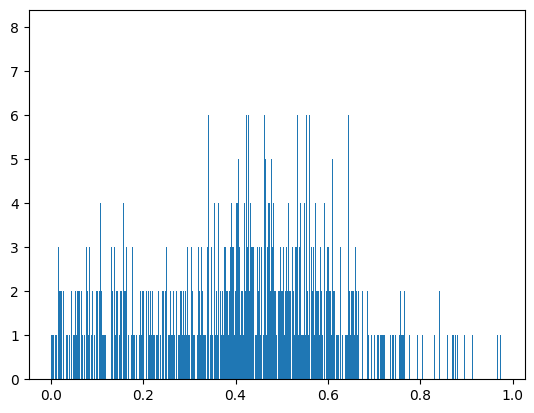

In [19]:
import matplotlib.pyplot as plt

plt.hist(val["expression"], bins=100)

In [29]:
train.to_csv("train.csv")
test.to_csv("test.csv")
val.to_csv("val.csv")